In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [140]:
class Tree:
    
    def __init__(self, maxHeight, maxRadius):
        self.maxHeight = maxHeight
        self.maxRadius = maxRadius
        self.layers = []
        self.numLayers = 0
    
    def addLayer(self, newLayer):
        # error checking here
        self.layers.append(newLayer)
        self.numLayers += 1
        self.layers = sorted(mainTree.layers, key=lambda x: x.height, reverse=True)

    def plotTree(self):
        # plot each layer on a 3D figure, rotate freely in notebook
        pass

In [161]:
class Layer():
    
    def __init__(self, height, radius):
        self.height = height
        self.radius = radius
        self.leaves = []
        self.numLeaves = 0
        
    def addLeaf(self, newLeaf):
        # error checking here
        self.leaves.append(newLeaf)
        self.numLeaves += 1
        
    # not the best but good for now
    def plotLayer(self):
        
        fig, ax = plt.subplots()
        
        layerCircle = plt.Circle((0,0), self.radius, color='k')
        ax.add_artist(layerCircle)
        
        for leaf in self.leaves:
            leafObj = plt.Circle(leaf.layerPos_cart, leaf.radius, color='r')
            ax.add_artist(leafObj)

        plt.axis('equal')
        plt.axis(list(200*np.array([-1, 1, -1, 1]))) # fix this

In [162]:
class Leaf():
    
    def __init__(self, radius, posOnLayer):
        self.radius = radius
        self.layerPos_cart = (posOnLayer[0]*np.cos(posOnLayer[1]), posOnLayer[0]*np.sin(posOnLayer[1]))

In [171]:
class LightSource:
    """
    Emit rays of light, check for intersection with layer, return proportion that made it through.
    """
    
    def __init__(self):
        
        pass
    
    def checkPenetration(self,layer):
        pass
        
    def checkLeafIntersection(self,leaf):
        pass

In [172]:
def deg2rad(degree):
    return degree*np.pi/180

def genPointFromCircle(rMax):
    t = 2*np.pi*np.random.random()
    u = np.random.random()+np.random.random()
    r = 2-u if u>1 else u
    x = rMax*r*np.cos(t)
    y = rMax*r*np.sin(t)
    return (x,y)

def checkDistance(pointCheck, leafCentre):
    x2 = (pointCheck[0] - leafCentre[0])**2
    y2 = (pointCheck[1] - leafCentre[1])**2
    return np.sqrt(x2+y2)

#def penetrationProportion_perLayer(layer, numTrials=10000):
#    count = 0
#    for i in range(numTrials):
#        pointCheck = genPointFromCircle(layer.radius)
#        intersect = False
#        for leaf in layer.leaves:
#            leafCentre = leaf.layerPos_cart
#            leafRadius = leaf.radius
#            dist2Point = checkDistance(pointCheck, leafCentre)
#            if dist2Point < leafRadius:
#                intersect = True
#                break
#        count += intersect
#    return count/numTrials

def penetrationTree(tree, numTrials=10000):
    
    stoppedAtLayer = np.array([0]*tree.numLayers)
    
    for i in range(numTrials):
        pointCheck = genPointFromCircle(tree.maxRadius)
        intersect = False
        
        for layer_index in range(tree.numLayers):
            layer = tree.layers[layer_index]
            
            for leaf in layer.leaves:
                leafCentre = leaf.layerPos_cart
                leafRadius = leaf.radius
                dist2Point = checkDistance(pointCheck, leafCentre)
                if dist2Point < leafRadius:
                    intersect = True
                    stoppedAtLayer[layer_index] += 1
                    break # stop checking leaves
                    
            if intersect:
                break # stop checking layers
                
    return stoppedAtLayer/numTrials

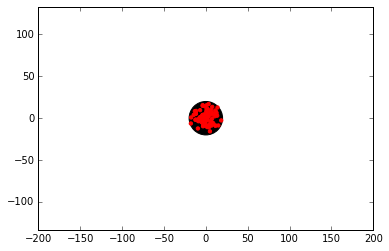

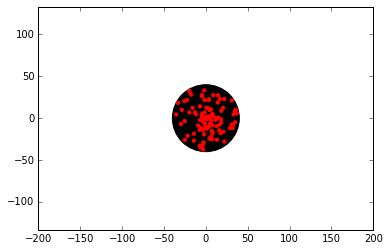

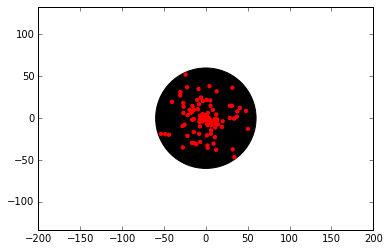

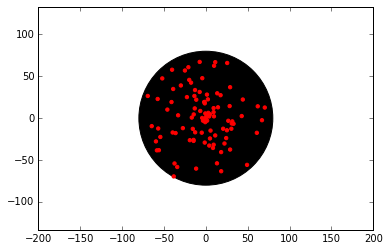

In [179]:
# Generate Main Tree
mainTree = Tree(maxHeight=100,maxRadius=100)

numLayers = 4
layerHeights = [20,40,60,80]
layerRadii = [80,60,40,20]

numLeaves = 100
leafRad = 2

# Generate Layers
for i in range(numLayers):
    layerTemp = Layer(height=layerHeights[i],radius=layerRadii[i])
    mainTree.addLayer(layerTemp)
    
    # Generate Leaves; fixed radius, random position
    for j in range(numLeaves):
        leafTemp = Leaf(radius=leafRad, posOnLayer=genPointFromCircle(layerRadii[i]))
        layerTemp.addLeaf(leafTemp)
    

# Plot Layers
for i in range(mainTree.numLayers):
    mainTree.layers[i].plotLayer()

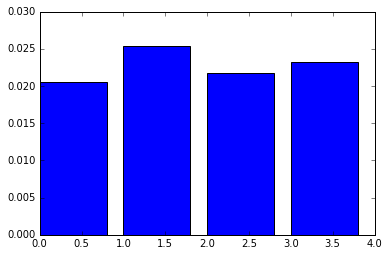

Light Absorbed: 9.09%


In [180]:
# check penetration
penTree = penetrationTree(mainTree)

plt.bar(range(mainTree.numLayers), penTree)
plt.show()

pctAbsorbed = sum(penTree)*100
print('Light Absorbed: {}%'.format(pctAbsorbed))